In [35]:
import json
import pandas as pd
from IPython.display import Image
import random

In [17]:
with open("data/caltech_images_20190919.json", 'r') as f:
    annotations = json.load(f)

### What's in the json file

In [18]:
annotations['info']

{'year': 2018,
 'contributor': 'Sara Beery',
 'date_created': '2018-07-03 18:34:36.573636',
 'version': 'Caltech Camera Traps',
 'description': 'Database of camera trap images collected from the NPS and the USGS with help from Justin Brown and Erin Boydston'}

In [19]:
annotations['categories']

[{'name': 'bobcat', 'id': 6},
 {'name': 'opossum', 'id': 1},
 {'name': 'empty', 'id': 30},
 {'name': 'coyote', 'id': 9},
 {'name': 'raccoon', 'id': 3},
 {'name': 'bird', 'id': 11},
 {'name': 'dog', 'id': 8},
 {'name': 'cat', 'id': 16},
 {'name': 'squirrel', 'id': 5},
 {'name': 'rabbit', 'id': 10},
 {'name': 'skunk', 'id': 7},
 {'name': 'lizard', 'id': 14},
 {'name': 'rodent', 'id': 99},
 {'name': 'badger', 'id': 21},
 {'name': 'deer', 'id': 34},
 {'name': 'cow', 'id': 37},
 {'name': 'car', 'id': 33},
 {'name': 'fox', 'id': 51},
 {'name': 'pig', 'id': 39},
 {'name': 'mountain_lion', 'id': 40},
 {'name': 'bat', 'id': 66},
 {'name': 'insect', 'id': 97}]

In [22]:
annotations['images'][0]

{'seq_num_frames': 1,
 'date_captured': '2013-10-04 13:31:53',
 'seq_id': '6f2160eb-5567-11e8-990e-dca9047ef277',
 'height': 1494,
 'width': 2048,
 'location': 26,
 'rights_holder': 'Erin Boydston',
 'file_name': 'train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg',
 'id': '5968c0f9-23d2-11e8-a6a3-ec086b02610b',
 'frame_num': 1}

In [25]:
catdf.head()

,name,id
0,bobcat,6
1,opossum,1
2,empty,30
3,coyote,9
4,raccoon,3


In [17]:
annotations['annotations'][0]

{'category_id': 6,
 'id': '207268a3-7d5b-11e7-884d-7845c41c2c67',
 'image_id': '58d61304-23d2-11e8-a6a3-ec086b02610b'}

In [22]:
print(len(annotations['images']))
print(len(annotations['annotations']))
print(len(annotations['categories']))

243100
245118
22


### Why are there duplicate annotations?

In [36]:
annot_df = pd.DataFrame.from_dict(annotations['annotations'])

In [37]:
annot_df.head()

,id,category_id,image_id
0,207268a3-7d5b-11e7-884d-7845c41c2c67,6,58d61304-23d2-11e8-a6a3-ec086b02610b
1,207268a4-7d5b-11e7-884d-7845c41c2c67,1,58e59acd-23d2-11e8-a6a3-ec086b02610b
2,207268a5-7d5b-11e7-884d-7845c41c2c67,30,58a6e5f1-23d2-11e8-a6a3-ec086b02610b
3,207268a6-7d5b-11e7-884d-7845c41c2c67,9,58ff0cef-23d2-11e8-a6a3-ec086b02610b
4,207268a7-7d5b-11e7-884d-7845c41c2c67,3,588f67b8-23d2-11e8-a6a3-ec086b02610b


In [38]:
image_df = pd.DataFrame.from_dict(annotations['images'])

In [39]:
image_df.head()

,seq_num_frames,date_captured,seq_id,height,width,location,rights_holder,file_name,id,frame_num
0,1,2013-10-04 13:31:53,6f2160eb-5567-11e8-990e-dca9047ef277,1494,2048,26,Erin Boydston,train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b...,5968c0f9-23d2-11e8-a6a3-ec086b02610b,1
1,1,2013-11-04 18:37:07,6f27ed66-5567-11e8-9e92-dca9047ef277,1494,2048,26,Erin Boydston,train_val/5a0b016f-23d2-11e8-a6a3-ec086b02610b...,5a0b016f-23d2-11e8-a6a3-ec086b02610b,1
2,3,2012-05-09 07:33:45,6f04895c-5567-11e8-a3d6-dca9047ef277,1494,2048,38,Justin Brown,train_val/59b93afb-23d2-11e8-a6a3-ec086b02610b...,59b93afb-23d2-11e8-a6a3-ec086b02610b,2
3,3,2012-03-29 02:34:13,6f0385b5-5567-11e8-a80b-dca9047ef277,1494,2048,38,Justin Brown,train_val/59641f56-23d2-11e8-a6a3-ec086b02610b...,59641f56-23d2-11e8-a6a3-ec086b02610b,2
4,3,2012-05-08 19:23:36,6f0a3ccf-5567-11e8-92fb-dca9047ef277,1494,2048,33,Justin Brown,train_val/5a1e5306-23d2-11e8-a6a3-ec086b02610b...,5a1e5306-23d2-11e8-a6a3-ec086b02610b,2


In [40]:
image_df.shape

(243100, 10)

In [41]:
annot_df.shape

(245118, 3)

In [42]:
# 243100 unique annotations - same as the images
annot_df['image_id'].nunique()

243100

In [43]:
dup_list = annot_df[annot_df['image_id'].duplicated()]['image_id']

In [44]:
annot_df[annot_df['image_id'].isin(dup_list)].sort_values(by=['image_id'])

# sometimes the duplicate annotations have the same category, sometimes not
# need to look at a few images..

,id,category_id,image_id
34276,26086,3,5858c0ac-23d2-11e8-a6a3-ec086b02610b
34275,26085,3,5858c0ac-23d2-11e8-a6a3-ec086b02610b
42849,db10e7e8-05ea-11e8-b642-dca9047ef277,6,5858c105-23d2-11e8-a6a3-ec086b02610b
42850,29cec31f-a2c8-4992-b362-9eece84c9555,10,5858c105-23d2-11e8-a6a3-ec086b02610b
60186,26253,8,5858c117-23d2-11e8-a6a3-ec086b02610b
...,...,...,...
36589,16808,6,5a2c8779-23d2-11e8-a6a3-ec086b02610b
15209,20211,9,5a2e1243-23d2-11e8-a6a3-ec086b02610b
15208,20210,9,5a2e1243-23d2-11e8-a6a3-ec086b02610b
22493,3740,6,5a2e1388-23d2-11e8-a6a3-ec086b02610b


### Map animal name and look at distribution

In [45]:
category_id = []
category_name = []

for i in annotations['categories']:
    category_id.append(i['id'])
    category_name.append(i['name'])
    
category_dict = dict(zip(category_id, category_name))
category_dict

{6: 'bobcat',
 1: 'opossum',
 30: 'empty',
 9: 'coyote',
 3: 'raccoon',
 11: 'bird',
 8: 'dog',
 16: 'cat',
 5: 'squirrel',
 10: 'rabbit',
 7: 'skunk',
 14: 'lizard',
 99: 'rodent',
 21: 'badger',
 34: 'deer',
 37: 'cow',
 33: 'car',
 51: 'fox',
 39: 'pig',
 40: 'mountain_lion',
 66: 'bat',
 97: 'insect'}

In [46]:
annot_df['category_name'] = annot_df['category_id'].map(category_dict)

In [47]:
annot_df.head()

,id,category_id,image_id,category_name
0,207268a3-7d5b-11e7-884d-7845c41c2c67,6,58d61304-23d2-11e8-a6a3-ec086b02610b,bobcat
1,207268a4-7d5b-11e7-884d-7845c41c2c67,1,58e59acd-23d2-11e8-a6a3-ec086b02610b,opossum
2,207268a5-7d5b-11e7-884d-7845c41c2c67,30,58a6e5f1-23d2-11e8-a6a3-ec086b02610b,empty
3,207268a6-7d5b-11e7-884d-7845c41c2c67,9,58ff0cef-23d2-11e8-a6a3-ec086b02610b,coyote
4,207268a7-7d5b-11e7-884d-7845c41c2c67,3,588f67b8-23d2-11e8-a6a3-ec086b02610b,raccoon


In [61]:
annot_df.groupby('category_name').image_id.count().sort_values()

category_name
pig                   2
bat                   3
insect                6
badger               50
mountain_lion       145
lizard              309
skunk              1898
fox                2574
cow                3626
rodent             4279
squirrel           4450
dog                4512
car                4717
cat                5297
bobcat             8098
bird              10003
raccoon           11390
deer              12196
rabbit            12519
coyote            16601
opossum           16698
empty            125745
Name: image_id, dtype: int64

In [76]:
#needs annot_df
path = 'data/cct_images/'
def show_image(images=1, category = 'any'):
    if category == 'any':
        samples = annot_df.sample(n=images)
    else:
        samples = annot_df[annot_df['category_name']==category].sample(n=images)
    for id, sample in samples.iterrows():
        image_id = sample['image_id']
        filename= path+image_id + '.jpg'
        display(Image(filename=filename))
        print(sample['category_name'] + " " + image_id)

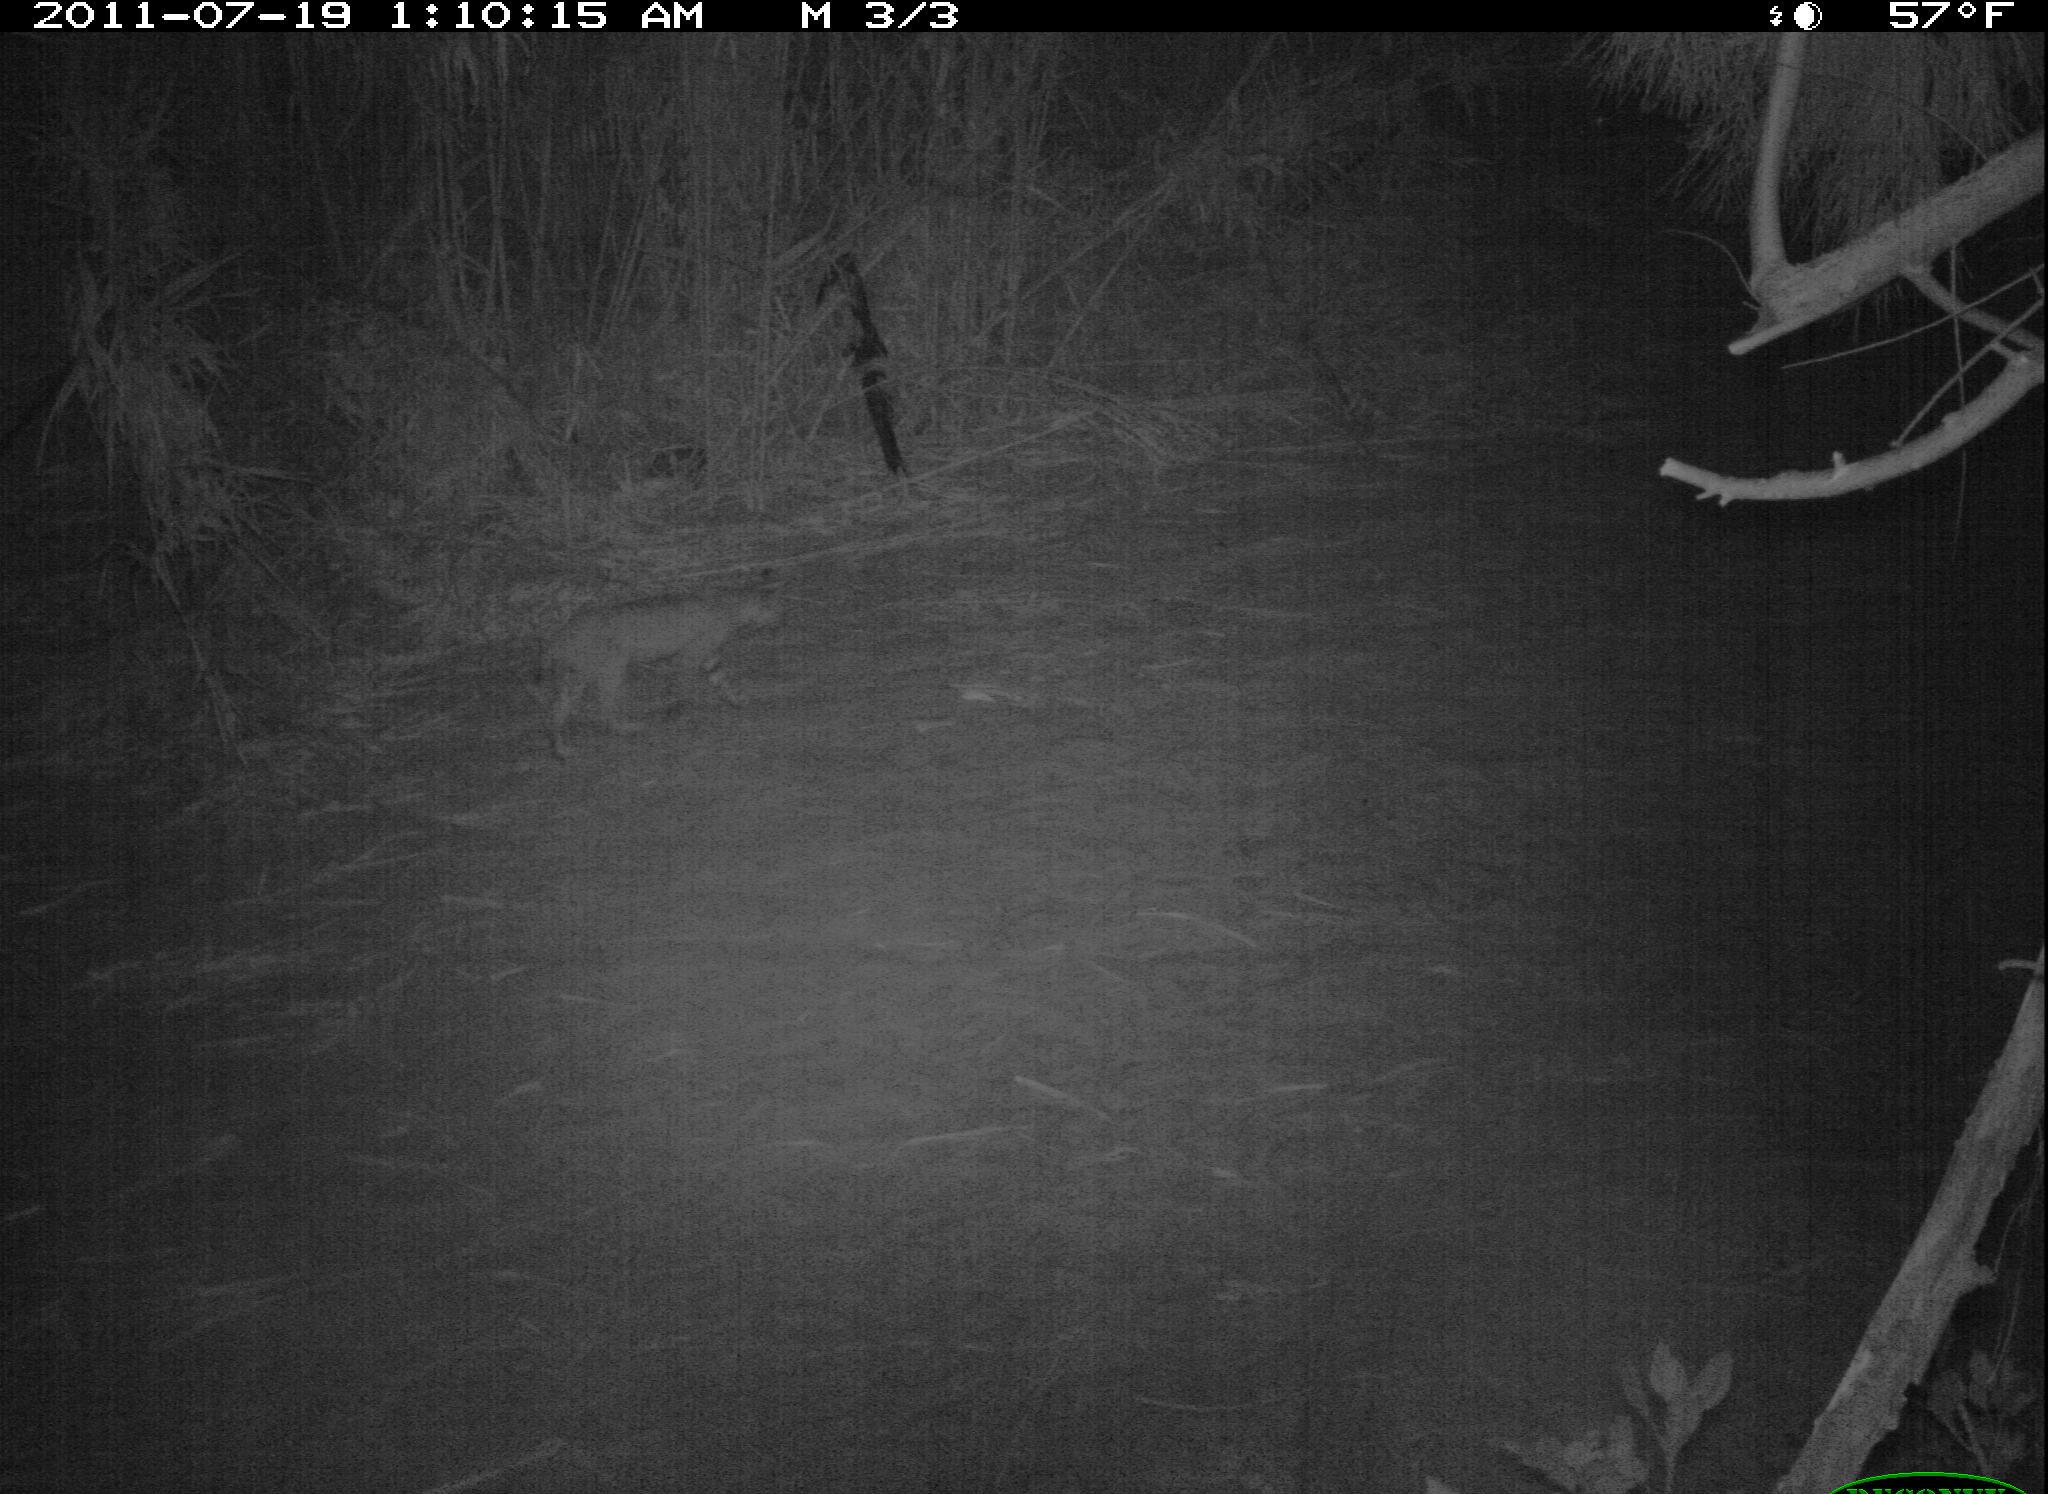

bobcat 59bca481-23d2-11e8-a6a3-ec086b02610b


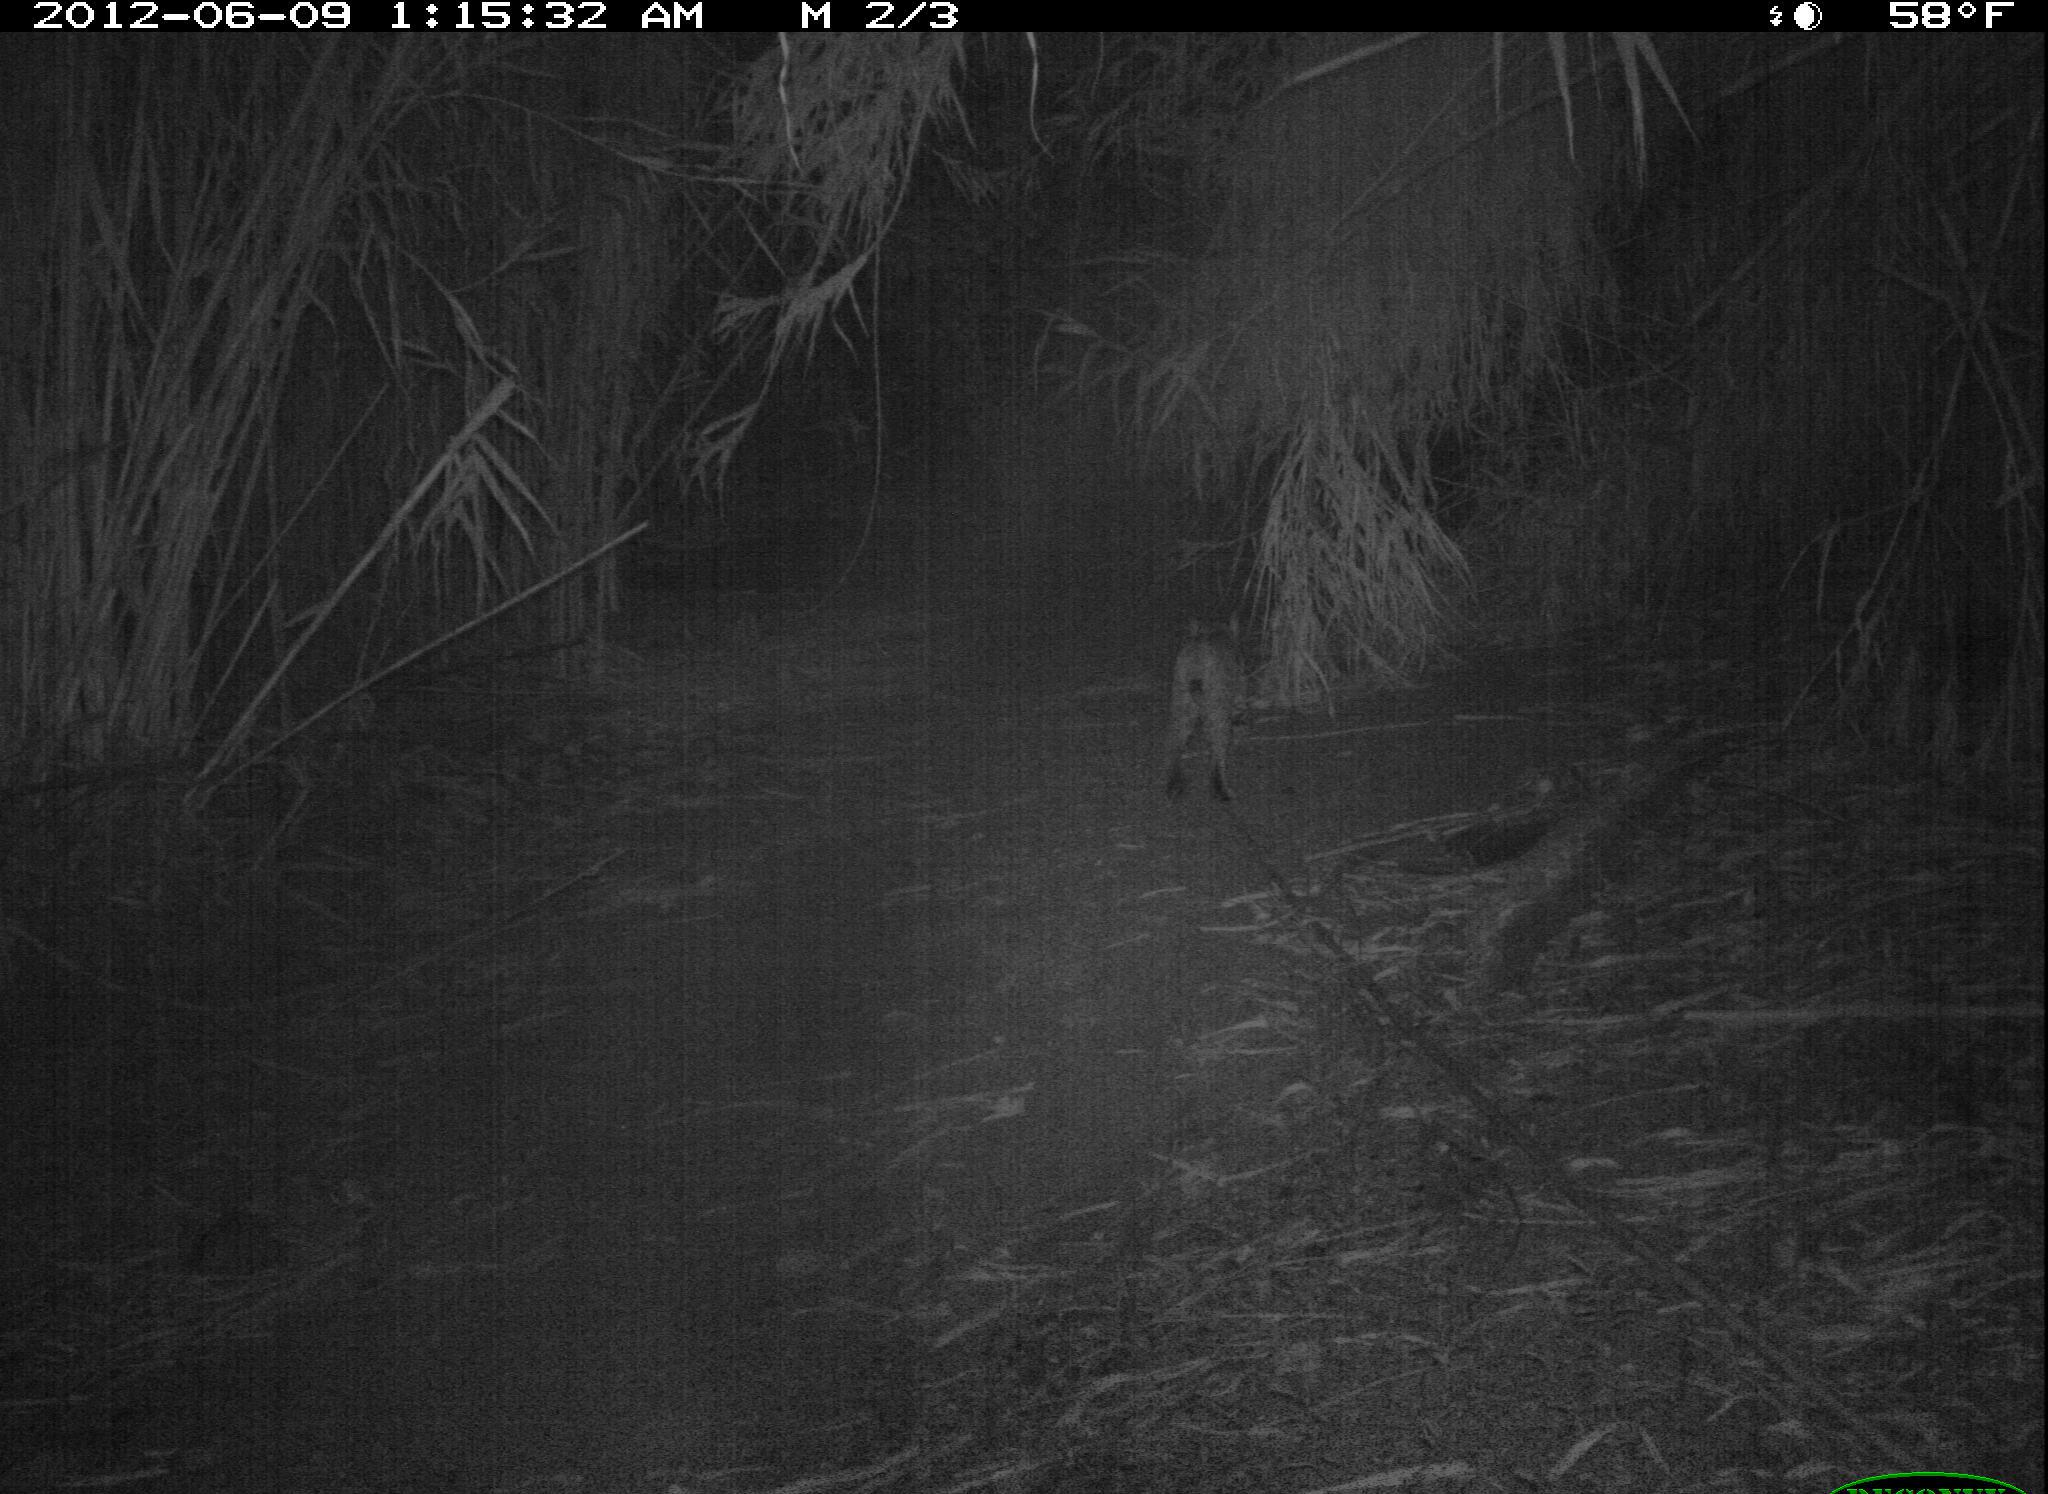

bobcat 58946146-23d2-11e8-a6a3-ec086b02610b


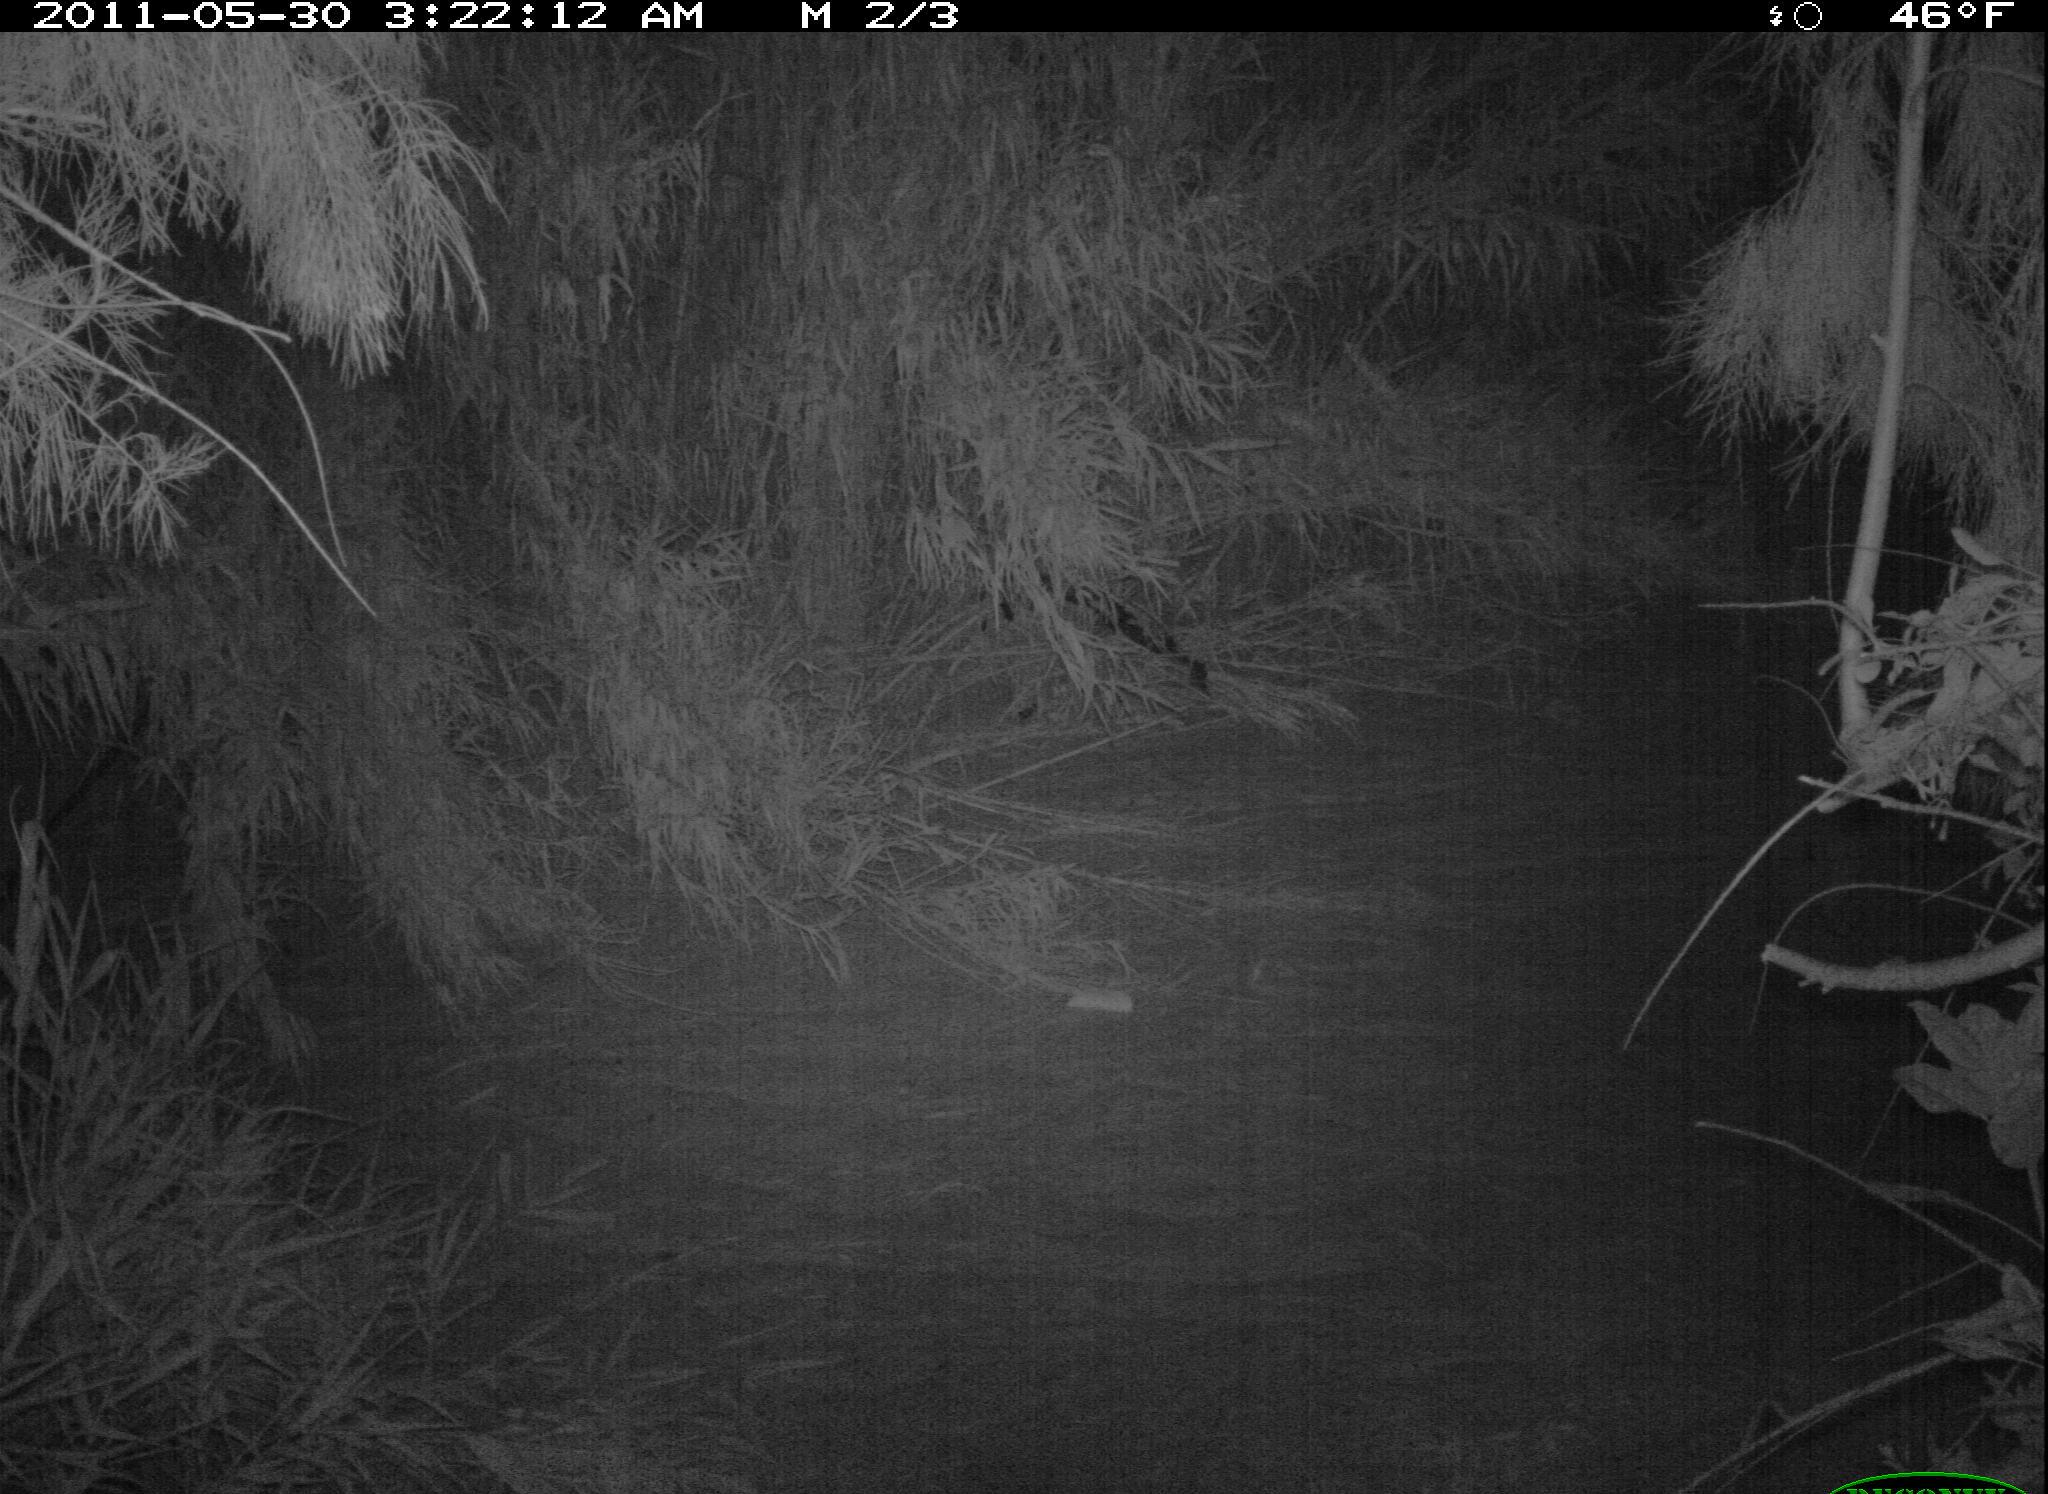

bobcat 59f799e2-23d2-11e8-a6a3-ec086b02610b


In [78]:
show_image(3, 'bobcat')